In [23]:
import numpy as np
import keras
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,Dropout
import math
import time
from keras.optimizers import SGD

### Data (strings) and splitting

In [4]:
fname="DATA/sequences16.csv"
sx,sy=np.loadtxt(fname,delimiter=',', usecols=(0,1), unpack =True, dtype=str)
N=len(sy)
print(N)
Ls=len(sx[0])
print(Ls)
print(sx[0],sy[0])


perc_train=0.8
N_train=int(N*perc_train)
N_test=N-N_train
print(f'\ndata: {N}\ntrain: {N_train} \ntest: {N_test}')


3000
16
AAGGTCTGCCGGCCGA 1

data: 3000
train: 2400 
test: 600


In [5]:
Q=['A','C','G','T']
Nc=4
onehc ={Q[i]: i for i in range(Nc)}
print(onehc)


{'A': 0, 'C': 1, 'G': 2, 'T': 3}


### Data conversion

In [7]:
y=sy.astype(int)

L=Ls*Nc
print(L)

x=np.zeros((N,L))
print(x[0])

for n in range (N):
    for i in range (Ls):
        x[n][i*4+ onehc [sx[n][i]]]=1
print(sx[0])
print(x[0])

64
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
AAGGTCTGCCGGCCGA
[1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0.
 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.
 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.]


### Split train/ test-validation

In [8]:
(x_train, y_train)= (x[:N_train], y[:N_train])
(x_test, y_test)= (x[N_train:], y[N_train:])

print(y_train.sum()/N_train)
print(y_test.sum()/N_test)

0.24333333333333335
0.25833333333333336


### Definition of model in Keras

In [9]:
np.random.seed(123)
model=Sequential()
model.add(Dense(L,input_shape=(L,),activation="relu"))
model.add(Dense(int(L/2),activation="relu"))
model.add(Dense(int(L/4),activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 6,785
Trainable params: 6,785
Non-trainable params: 0
_________________________________________________________________
None


In [10]:
opt1=SGD(learning_rate=0.01,
         momentum=0.9, #if it is =0 it's = to vanilla gd
        nesterov=True)


model.compile(loss="binary_crossentropy", 
              optimizer=opt1,metrics=['accuracy'])

In [13]:
fit=model.fit(x_train, y_train,
              epochs=300, batch_size=50, 
              validation_data=(x_test, y_test), shuffle=True)

Train on 2400 samples, validate on 600 samples
Epoch 1/300
2400/2400 [==============================] - 0s 37us/step - loss: 0.0773 - accuracy: 0.9737 - val_loss: 0.7555 - val_accuracy: 0.7783
Epoch 2/300
2400/2400 [==============================] - 0s 37us/step - loss: 0.0690 - accuracy: 0.9775 - val_loss: 0.8250 - val_accuracy: 0.7817
Epoch 3/300
2400/2400 [==============================] - 0s 37us/step - loss: 0.0606 - accuracy: 0.9762 - val_loss: 0.9856 - val_accuracy: 0.7817
Epoch 4/300
2400/2400 [==============================] - 0s 38us/step - loss: 0.0555 - accuracy: 0.9837 - val_loss: 0.8549 - val_accuracy: 0.7683
Epoch 5/300
2400/2400 [==============================] - 0s 38us/step - loss: 0.0473 - accuracy: 0.9875 - val_loss: 0.8399 - val_accuracy: 0.7933
Epoch 6/300
2400/2400 [==============================] - 0s 42us/step - loss: 0.0394 - accuracy: 0.9917 - val_loss: 0.8971 - val_accuracy: 0.7767
Epoch 7/300
2400/2400 [==============================] - 0s 37us/step - loss:

2400/2400 [==============================] - 0s 30us/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 1.6053 - val_accuracy: 0.7833
Epoch 57/300
2400/2400 [==============================] - 0s 31us/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 1.5604 - val_accuracy: 0.7883
Epoch 58/300
2400/2400 [==============================] - 0s 35us/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 1.5722 - val_accuracy: 0.7900
Epoch 59/300
2400/2400 [==============================] - 0s 35us/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 1.5954 - val_accuracy: 0.7867
Epoch 60/300
2400/2400 [==============================] - 0s 35us/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 1.5850 - val_accuracy: 0.7850
Epoch 61/300
2400/2400 [==============================] - 0s 40us/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 1.6191 - val_accuracy: 0.7817
Epoch 62/300
2400/2400 [==============================] - 0s 30us/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 1.6486 - val_a

Epoch 111/300
2400/2400 [==============================] - 0s 31us/step - loss: 0.0013 - accuracy: 0.9996 - val_loss: 1.9447 - val_accuracy: 0.7933
Epoch 112/300
2400/2400 [==============================] - 0s 33us/step - loss: 6.0727e-04 - accuracy: 1.0000 - val_loss: 1.8771 - val_accuracy: 0.7933
Epoch 113/300
2400/2400 [==============================] - 0s 33us/step - loss: 7.2184e-04 - accuracy: 1.0000 - val_loss: 1.8545 - val_accuracy: 0.7933
Epoch 114/300
2400/2400 [==============================] - 0s 26us/step - loss: 4.1172e-04 - accuracy: 1.0000 - val_loss: 1.8671 - val_accuracy: 0.7933
Epoch 115/300
2400/2400 [==============================] - 0s 30us/step - loss: 4.2432e-04 - accuracy: 1.0000 - val_loss: 1.8737 - val_accuracy: 0.7933
Epoch 116/300
2400/2400 [==============================] - 0s 30us/step - loss: 6.5520e-04 - accuracy: 1.0000 - val_loss: 1.8693 - val_accuracy: 0.7950
Epoch 117/300
2400/2400 [==============================] - 0s 32us/step - loss: 0.0018 - acc

Epoch 165/300
2400/2400 [==============================] - 0s 35us/step - loss: 0.0010 - accuracy: 0.9996 - val_loss: 2.0655 - val_accuracy: 0.7833
Epoch 166/300
2400/2400 [==============================] - 0s 32us/step - loss: 7.8865e-04 - accuracy: 1.0000 - val_loss: 2.0594 - val_accuracy: 0.7850
Epoch 167/300
2400/2400 [==============================] - 0s 30us/step - loss: 2.9267e-04 - accuracy: 1.0000 - val_loss: 2.0694 - val_accuracy: 0.7800
Epoch 168/300
2400/2400 [==============================] - 0s 31us/step - loss: 4.8748e-04 - accuracy: 1.0000 - val_loss: 2.0758 - val_accuracy: 0.7800
Epoch 169/300
2400/2400 [==============================] - 0s 32us/step - loss: 4.6357e-04 - accuracy: 1.0000 - val_loss: 2.0555 - val_accuracy: 0.7867
Epoch 170/300
2400/2400 [==============================] - 0s 34us/step - loss: 6.2671e-04 - accuracy: 1.0000 - val_loss: 2.0651 - val_accuracy: 0.7833
Epoch 171/300
2400/2400 [==============================] - ETA: 0s - loss: 6.7504e-04 - accu

2400/2400 [==============================] - 0s 29us/step - loss: 6.2815e-04 - accuracy: 1.0000 - val_loss: 2.0614 - val_accuracy: 0.7950
Epoch 219/300
2400/2400 [==============================] - 0s 30us/step - loss: 2.6444e-04 - accuracy: 1.0000 - val_loss: 2.0736 - val_accuracy: 0.7983
Epoch 220/300
2400/2400 [==============================] - 0s 40us/step - loss: 3.8588e-04 - accuracy: 1.0000 - val_loss: 2.0724 - val_accuracy: 0.7950
Epoch 221/300
2400/2400 [==============================] - 0s 39us/step - loss: 2.8283e-04 - accuracy: 1.0000 - val_loss: 2.0584 - val_accuracy: 0.7983
Epoch 222/300
2400/2400 [==============================] - 0s 32us/step - loss: 3.8764e-04 - accuracy: 1.0000 - val_loss: 2.1032 - val_accuracy: 0.8000
Epoch 223/300
2400/2400 [==============================] - 0s 32us/step - loss: 4.5695e-04 - accuracy: 0.9996 - val_loss: 2.0817 - val_accuracy: 0.7900
Epoch 224/300
2400/2400 [==============================] - 0s 32us/step - loss: 1.9244e-04 - accuracy:

2400/2400 [==============================] - 0s 33us/step - loss: 6.5199e-04 - accuracy: 1.0000 - val_loss: 1.7762 - val_accuracy: 0.7800
Epoch 273/300
2400/2400 [==============================] - 0s 33us/step - loss: 4.4557e-04 - accuracy: 1.0000 - val_loss: 1.7751 - val_accuracy: 0.7817
Epoch 274/300
2400/2400 [==============================] - ETA: 0s - loss: 5.2262e-04 - accuracy: 1.00 - 0s 32us/step - loss: 5.0426e-04 - accuracy: 1.0000 - val_loss: 1.7807 - val_accuracy: 0.7833
Epoch 275/300
2400/2400 [==============================] - 0s 30us/step - loss: 6.1925e-04 - accuracy: 1.0000 - val_loss: 1.7971 - val_accuracy: 0.7833
Epoch 276/300
2400/2400 [==============================] - 0s 33us/step - loss: 5.0297e-04 - accuracy: 1.0000 - val_loss: 1.7931 - val_accuracy: 0.7833
Epoch 277/300
2400/2400 [==============================] - 0s 32us/step - loss: 5.3480e-04 - accuracy: 1.0000 - val_loss: 1.8018 - val_accuracy: 0.7817
Epoch 278/300
2400/2400 [==============================]

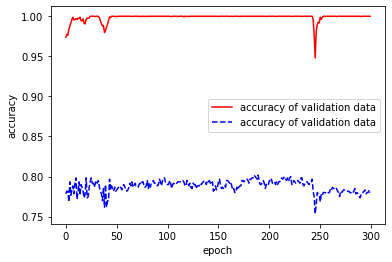

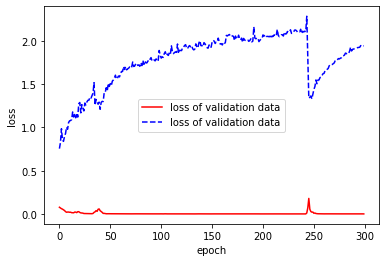

In [14]:
for  obs in ("accuracy", "loss"):
    plt.figure(figsize=(6,4))
    plt.plot(fit.history[obs], "r",
            label=obs+" of validation data")
    plt.plot(fit.history["val_"+obs], "b--",
            label=obs+" of validation data")
    plt.ylabel(obs)
    plt.xlabel("epoch")
    plt.legend()
    plt.show()

In [28]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

# call Keras scikit wrapper
model_gridsearch = KerasClassifier(build_fn=model, 
                        epochs=1, 
                        batch_size=50, 
                        verbose=1)

# list of allowed optional arguments for the optimizer, see `compile_model()`
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
# define parameter dictionary
param_grid = dict(optimizer=optimizer)
# call scikit grid search module
grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=1, cv=4)
grid_result = grid.fit(x_train,y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

ValueError: optimizer is not a legal parameter

### Step 6: Modify the Hyperparameters to Optimize Performance of the Model